<a href="https://colab.research.google.com/github/8johan/devoir/blob/main/mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import sys 


In [4]:
fname = '/content/splice (1).data'
with open(fname) as f:
    content = f.readlines()
content = [x.strip().split(',') for x in content]
for l in content:
    for i in range(len(l)):
        l[i] = l[i].strip()
raw_data = np.array(content)

In [5]:
raw_data

array([['EI', 'ATRINS-DONOR-521',
        'CCAGCTGCATCACAGGAGGCCAGCGAGCAGGTCTGTTCCAAGGGCCTTCGAGCCAGTCTG'],
       ['EI', 'ATRINS-DONOR-905',
        'AGACCCGCCGGGAGGCGGAGGACCTGCAGGGTGAGCCCCACCGCCCCTCCGTGCCCCCGC'],
       ['EI', 'BABAPOE-DONOR-30',
        'GAGGTGAAGGACGTCCTTCCCCAGGAGCCGGTGAGAAGCGCAGTCGGGGGCACGGGGATG'],
       ...,
       ['N', 'ORARGIT-NEG-241',
        'TCTCGGGGGCGGCCGGCGCGGCGGGGAGCGGTCCCCGGCCGCGGCCCCGACGTGTGTGTC'],
       ['N', 'TARHBB-NEG-541',
        'ATTCTACTTAGTAAACATAATTTCTTGTGCTAGATAACCAAATTAAGAAAACCAAAACAA'],
       ['N', 'TARHBD-NEG-1981',
        'AGGCTGCCTATCAGAAGGTGGTGGCTGGTGTGGCTGCTGCTCTGGCTCACAAGTACCATT']],
      dtype='<U60')

In [6]:
 column_names=['type', 'Donor', 'seq ']
x = pd.DataFrame(raw_data,columns = column_names)
x.head()

,type,Donor,seq
0,EI,ATRINS-DONOR-521,CCAGCTGCATCACAGGAGGCCAGCGAGCAGGTCTGTTCCAAGGGCC...
1,EI,ATRINS-DONOR-905,AGACCCGCCGGGAGGCGGAGGACCTGCAGGGTGAGCCCCACCGCCC...
2,EI,BABAPOE-DONOR-30,GAGGTGAAGGACGTCCTTCCCCAGGAGCCGGTGAGAAGCGCAGTCG...
3,EI,BABAPOE-DONOR-867,GGGCTGCGTTGCTGGTCACATTCCTGGCAGGTATGGGGCGGGGCTT...
4,EI,BABAPOE-DONOR-2817,GCTCAGCCCCCAGGTCACCCAGGAACTGACGTGAGTGTCCCCATCC...


In [7]:
import re
def string_to_array(seq_string):
   seq_string = seq_string.lower()
   seq_string = re.sub('[^acgt]', 'z', seq_string)
   seq_string = np.array(list(seq_string))
   return seq_string
# create a label encoder with 'acgtn' alphabet
from sklearn.preprocessing import LabelEncoder



In [8]:
def ordinal_encoder(my_array):
   label_encoder = LabelEncoder()
   label_encoder.fit(np.array(['a','c','g','t','z']))
   integer_encoded = label_encoder.transform(my_array)
   float_encoded = integer_encoded.astype(float)
   float_encoded[float_encoded == 0] = 0.25 # A
   float_encoded[float_encoded == 1] = 0.25 # C
   float_encoded[float_encoded == 2] =0.75 # G
   float_encoded[float_encoded == 3] = 1 # T
   float_encoded[float_encoded == 4] = 0.00 # anything else, lets say n
   

   return float_encoded

In [9]:
l=[]
for i in range(3190):
  o=raw_data[i][2]
  u=ordinal_encoder(string_to_array(raw_data[i][2]))
  l.append(u)

In [19]:
u = pd.DataFrame(l)
r = pd.concat([x, u], axis=1)
r

,type,Donor,seq,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,EI,ATRINS-DONOR-521,CCAGCTGCATCACAGGAGGCCAGCGAGCAGGTCTGTTCCAAGGGCC...,0.25,0.25,0.25,0.75,0.25,1.00,0.75,0.25,0.25,1.00,0.25,0.25,0.25,0.25,0.75,0.75,0.25,0.75,0.75,0.25,0.25,0.25,0.75,0.25,0.75,0.25,0.75,0.25,0.25,0.75,0.75,1.00,0.25,1.00,0.75,1.00,1.00,0.25,0.25,0.25,0.25,0.75,0.75,0.75,0.25,0.25,1.00,1.00,0.25,0.75,0.25,0.75,0.25,0.25,0.25,0.75,1.00,0.25,1.00,0.75
1,EI,ATRINS-DONOR-905,AGACCCGCCGGGAGGCGGAGGACCTGCAGGGTGAGCCCCACCGCCC...,0.25,0.75,0.25,0.25,0.25,0.25,0.75,0.25,0.25,0.75,0.75,0.75,0.25,0.75,0.75,0.25,0.75,0.75,0.25,0.75,0.75,0.25,0.25,0.25,1.00,0.75,0.25,0.25,0.75,0.75,0.75,1.00,0.75,0.25,0.75,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.75,0.25,0.25,0.25,0.25,1.00,0.25,0.25,0.75,1.00,0.75,0.25,0.25,0.25,0.25,0.25,0.75,0.25
2,EI,BABAPOE-DONOR-30,GAGGTGAAGGACGTCCTTCCCCAGGAGCCGGTGAGAAGCGCAGTCG...,0.75,0.25,0.75,0.75,1.00,0.75,0.25,0.25,0.75,0.75,0.25,0.25,0.75,1.00,0.25,0.25,1.00,1.00,0.25,0.25,0.25,0.25,0.25,0.75,0.75,0.25,0.75,0.25,0.25,0.75,0.75,1.00,0.75,0.25,0.75,0.25,0.25,0.75,0.25,0.75,0.25,0.25,0.75,1.00,0.25,0.75,0.75,0.75,0.75,0.75,0.25,0.25,0.25,0.75,0.75,0.75,0.75,0.25,1.00,0.75
3,EI,BABAPOE-DONOR-867,GGGCTGCGTTGCTGGTCACATTCCTGGCAGGTATGGGGCGGGGCTT...,0.75,0.75,0.75,0.25,1.00,0.75,0.25,0.75,1.00,1.00,0.75,0.25,1.00,0.75,0.75,1.00,0.25,0.25,0.25,0.25,1.00,1.00,0.25,0.25,1.00,0.75,0.75,0.25,0.25,0.75,0.75,1.00,0.25,1.00,0.75,0.75,0.75,0.75,0.25,0.75,0.75,0.75,0.75,0.25,1.00,1.00,0.75,0.25,1.00,0.25,0.75,0.75,1.00,1.00,1.00,1.00,0.25,0.25,0.25,0.25
4,EI,BABAPOE-DONOR-2817,GCTCAGCCCCCAGGTCACCCAGGAACTGACGTGAGTGTCCCCATCC...,0.75,0.25,1.00,0.25,0.25,0.75,0.25,0.25,0.25,0.25,0.25,0.25,0.75,0.75,1.00,0.25,0.25,0.25,0.25,0.25,0.25,0.75,0.75,0.25,0.25,0.25,1.00,0.75,0.25,0.25,0.75,1.00,0.75,0.25,0.75,1.00,0.75,1.00,0.25,0.25,0.25,0.25,0.25,1.00,0.25,0.25,0.25,0.75,0.75,0.25,0.25,0.25,1.00,1.00,0.75,0.25,0.25,0.25,0.25,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3185,N,ORAHBPSBD-NEG-2881,TCTCTTCCCTTCCCCTCTCTCTTTCTTTCTTTTCTCTCCTCTTCTC...,1.00,0.25,1.00,0.25,1.00,1.00,0.25,0.25,0.25,1.00,1.00,0.25,0.25,0.25,0.25,1.00,0.25,1.00,0.25,1.00,0.25,1.00,1.00,1.00,0.25,1.00,1.00,1.00,0.25,1.00,1.00,1.00,1.00,0.25,1.00,0.25,1.00,0.25,0.25,1.00,0.25,1.00,1.00,0.25,1.00,0.25,1.00,1.00,0.25,1.00,1.00,1.00,0.25,0.25,1.00,0.25,1.00,0.25,1.00,1.00
3186,N,ORAINVOL-NEG-2161,GAGCTCCCAGAGCAGCAAGAGGGCCAGCTGAAGCACCTGGAGAAGC...,0.75,0.25,0.75,0.25,1.00,0.25,0.25,0.25,0.25,0.75,0.25,0.75,0.25,0.25,0.75,0.25,0.25,0.25,0.75,0.25,0.75,0.75,0.75,0.25,0.25,0.25,0.75,0.25,1.00,0.75,0.25,0.25,0.75,0.25,0.25,0.25,0.25,1.00,0.75,0.75,0.25,0.75,0.25,0.25,0.75,0.25,0.25,0.75,0.75,0.25,0.75,0.75,0.25,0.25,0.25,0.25,0.75,0.25,1.00,0.75
3187,N,ORARGIT-NEG-241,TCTCGGGGGCGGCCGGCGCGGCGGGGAGCGGTCCCCGGCCGCGGCC...,1.00,0.25,1.00,0.25,0.75,0.75,0.75,0.75,0.75,0.25,0.75,0.75,0.25,0.25,0.75,0.75,0.25,0.75,0.25,0.75,0.75,0.25,0.75,0.75,0.75,0.75,0.25,0.75,0.25,0.75,0.75,1.00,0.25,0.25,0.25,0.25,0.75,0.75,0.25,0.25,0.75,0.25,0.75,0.75,0.25,0.25,0.25,0.25,0.75,0.25,0.25,0.75,1.00,0.75,1.00,0.75,1.00,0.75,1.00,0.25
3188,N,TARHBB-NEG-541,ATTCTACTTAGTAAACATAATTTCTTGTGCTAGATAACCAAATTAA...,0.25,1.00,1.00,0.25,1.00,0.25,0.25,1.00,1.00,0.25,0.75,1.00,0.25,0.25,0.25,0.25,0.25,1.00,0.25,0.25,1.00,1.00,1.00,0.25,1.00,1.00,0.75,1.00,0.75,0.25,1.00,0.25,0.75,0.25,1.00,0.25,0.25,0.25,0.25,0.25,0.25,0.25,1.00,1.00,0.25,0.25,0.75,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25


In [20]:
r['type']=r['type'].map({'N':0,'EI':1,'IE':2},na_action=None)

In [25]:
r

,type,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,1,0.25,0.25,0.25,0.75,0.25,1.00,0.75,0.25,0.25,1.00,0.25,0.25,0.25,0.25,0.75,0.75,0.25,0.75,0.75,0.25,0.25,0.25,0.75,0.25,0.75,0.25,0.75,0.25,0.25,0.75,0.75,1.00,0.25,1.00,0.75,1.00,1.00,0.25,0.25,0.25,0.25,0.75,0.75,0.75,0.25,0.25,1.00,1.00,0.25,0.75,0.25,0.75,0.25,0.25,0.25,0.75,1.00,0.25,1.00,0.75
1,1,0.25,0.75,0.25,0.25,0.25,0.25,0.75,0.25,0.25,0.75,0.75,0.75,0.25,0.75,0.75,0.25,0.75,0.75,0.25,0.75,0.75,0.25,0.25,0.25,1.00,0.75,0.25,0.25,0.75,0.75,0.75,1.00,0.75,0.25,0.75,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.75,0.25,0.25,0.25,0.25,1.00,0.25,0.25,0.75,1.00,0.75,0.25,0.25,0.25,0.25,0.25,0.75,0.25
2,1,0.75,0.25,0.75,0.75,1.00,0.75,0.25,0.25,0.75,0.75,0.25,0.25,0.75,1.00,0.25,0.25,1.00,1.00,0.25,0.25,0.25,0.25,0.25,0.75,0.75,0.25,0.75,0.25,0.25,0.75,0.75,1.00,0.75,0.25,0.75,0.25,0.25,0.75,0.25,0.75,0.25,0.25,0.75,1.00,0.25,0.75,0.75,0.75,0.75,0.75,0.25,0.25,0.25,0.75,0.75,0.75,0.75,0.25,1.00,0.75
3,1,0.75,0.75,0.75,0.25,1.00,0.75,0.25,0.75,1.00,1.00,0.75,0.25,1.00,0.75,0.75,1.00,0.25,0.25,0.25,0.25,1.00,1.00,0.25,0.25,1.00,0.75,0.75,0.25,0.25,0.75,0.75,1.00,0.25,1.00,0.75,0.75,0.75,0.75,0.25,0.75,0.75,0.75,0.75,0.25,1.00,1.00,0.75,0.25,1.00,0.25,0.75,0.75,1.00,1.00,1.00,1.00,0.25,0.25,0.25,0.25
4,1,0.75,0.25,1.00,0.25,0.25,0.75,0.25,0.25,0.25,0.25,0.25,0.25,0.75,0.75,1.00,0.25,0.25,0.25,0.25,0.25,0.25,0.75,0.75,0.25,0.25,0.25,1.00,0.75,0.25,0.25,0.75,1.00,0.75,0.25,0.75,1.00,0.75,1.00,0.25,0.25,0.25,0.25,0.25,1.00,0.25,0.25,0.25,0.75,0.75,0.25,0.25,0.25,1.00,1.00,0.75,0.25,0.25,0.25,0.25,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3185,0,1.00,0.25,1.00,0.25,1.00,1.00,0.25,0.25,0.25,1.00,1.00,0.25,0.25,0.25,0.25,1.00,0.25,1.00,0.25,1.00,0.25,1.00,1.00,1.00,0.25,1.00,1.00,1.00,0.25,1.00,1.00,1.00,1.00,0.25,1.00,0.25,1.00,0.25,0.25,1.00,0.25,1.00,1.00,0.25,1.00,0.25,1.00,1.00,0.25,1.00,1.00,1.00,0.25,0.25,1.00,0.25,1.00,0.25,1.00,1.00
3186,0,0.75,0.25,0.75,0.25,1.00,0.25,0.25,0.25,0.25,0.75,0.25,0.75,0.25,0.25,0.75,0.25,0.25,0.25,0.75,0.25,0.75,0.75,0.75,0.25,0.25,0.25,0.75,0.25,1.00,0.75,0.25,0.25,0.75,0.25,0.25,0.25,0.25,1.00,0.75,0.75,0.25,0.75,0.25,0.25,0.75,0.25,0.25,0.75,0.75,0.25,0.75,0.75,0.25,0.25,0.25,0.25,0.75,0.25,1.00,0.75
3187,0,1.00,0.25,1.00,0.25,0.75,0.75,0.75,0.75,0.75,0.25,0.75,0.75,0.25,0.25,0.75,0.75,0.25,0.75,0.25,0.75,0.75,0.25,0.75,0.75,0.75,0.75,0.25,0.75,0.25,0.75,0.75,1.00,0.25,0.25,0.25,0.25,0.75,0.75,0.25,0.25,0.75,0.25,0.75,0.75,0.25,0.25,0.25,0.25,0.75,0.25,0.25,0.75,1.00,0.75,1.00,0.75,1.00,0.75,1.00,0.25
3188,0,0.25,1.00,1.00,0.25,1.00,0.25,0.25,1.00,1.00,0.25,0.75,1.00,0.25,0.25,0.25,0.25,0.25,1.00,0.25,0.25,1.00,1.00,1.00,0.25,1.00,1.00,0.75,1.00,0.75,0.25,1.00,0.25,0.75,0.25,1.00,0.25,0.25,0.25,0.25,0.25,0.25,0.25,1.00,1.00,0.25,0.25,0.75,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25


In [26]:

o=r
o=o.drop('type',axis=1)

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(o)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])

In [68]:
final=pd.concat([principalDf,r['type'] ], axis=1)

In [70]:
final

,PC1,PC2,type
0,0.181097,-0.486389,1
1,0.646207,-0.081794,1
2,-0.152568,-0.522196,1
3,-0.803566,-0.150457,1
4,0.658363,-0.704087,1
...,...,...,...
3185,-0.849828,-0.502038,0
3186,0.572696,0.316545,0
3187,-0.241630,-0.178083,0
3188,0.297472,0.484498,0


In [71]:
final['type']=final['type'].map({1:'EI',0:'N',2:'IE'},na_action=None)

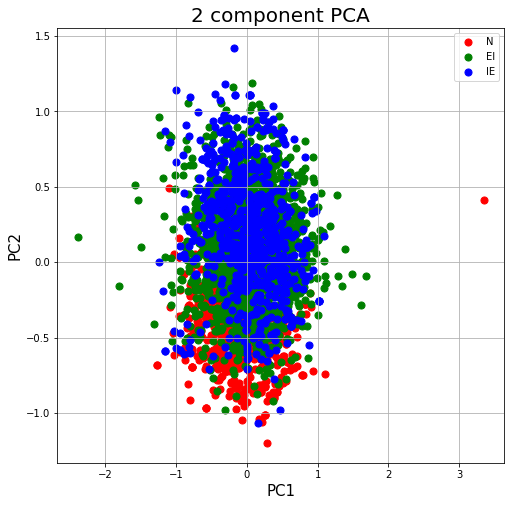

In [73]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['N', 'EI', 'IE']
colors = ['r', 'g', 'b']

indicesToKeep1 = final['type'] == 'EI'
indicesToKeep2 = final['type'] == 'N'
indicesToKeep3 = final['type'] == 'IE'

ax.scatter(final.loc[indicesToKeep1, 'PC1'], final.loc[indicesToKeep1, 'PC2'], c = 'r', s = 50)
ax.scatter(final.loc[indicesToKeep2, 'PC1'], final.loc[indicesToKeep2, 'PC2'], c = 'g', s = 50)
ax.scatter(final.loc[indicesToKeep3, 'PC1'], final.loc[indicesToKeep3, 'PC2'], c = 'b', s = 50)
ax.legend(targets)
ax.grid()

In [74]:
final['type']=final['type'].map({'EI':1,'N':0,'IE':2},na_action=None)

In [75]:
final

,PC1,PC2,type
0,0.181097,-0.486389,1
1,0.646207,-0.081794,1
2,-0.152568,-0.522196,1
3,-0.803566,-0.150457,1
4,0.658363,-0.704087,1
...,...,...,...
3185,-0.849828,-0.502038,0
3186,0.572696,0.316545,0
3187,-0.241630,-0.178083,0
3188,0.297472,0.484498,0


In [76]:
y=np.c_[final["type"]]
x=np.c_[final['PC1'],final['PC2']]


In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size = 0.3, random_state = 1)

In [81]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [85]:

from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC , LinearSVC
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA

In [93]:
C = 1.0  # SVM regularization parameter
svc = SVC(kernel='linear', C=C).fit(X_train, y_train)
rbf_svc = SVC(kernel='rbf', gamma=0.5, C=C).fit(X_train, y_train)
poly_svc = SVC(kernel='poly', degree=5, C=C).fit(X_train, y_train)
lin_svc = LinearSVC(C=C).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [89]:
h = .02 
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

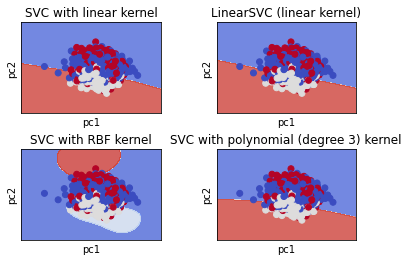

In [92]:


# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
    plt.xlabel('pc1')
    plt.ylabel('pc2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

In [95]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', C=10**7).fit(X_train, y_train)
w_star = clf.coef_[0]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


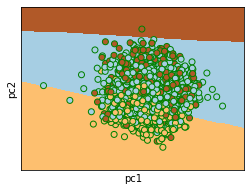

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets



# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
h = 0.02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors="g", cmap=plt.cm.Paired)
plt.xlabel("pc1")
plt.ylabel("pc2")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

In [99]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

print(accuracy_score(y_test, y_pred_tree))

0.5454545454545454


In [102]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)

print(accuracy_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.5893416927899686


In [106]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[y==0, 0], X[, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.plot(X[:, 0][y==2], X[:, 2][y==2], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

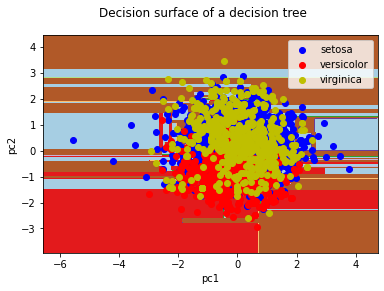

In [117]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02



for pairidx, pair in enumerate([[0, 1]]):
    # We only take the two corresponding features
    X = X_train
    y = y_train

    # Shuffle
    idx = np.arange(X.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    # Standardize
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(1, 1, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel('pc1')
    plt.ylabel('pc2')
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree ")
plt.legend()
plt.show()

In [ ]:
new_x=f.head(100)
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(new_x)
wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()